# Personal Finance Tracker 💰

## Introduction

Welcome to this Personal Finance Tracker project! This notebook will teach you how to:
- Store and manage expense data using **pandas DataFrames**
- Perform data analysis and grouping operations
- Create professional visualizations
- Save and load data to/from CSV files

### What You'll Learn:
1. **Data Structures**: How to work with pandas DataFrames
2. **Data Manipulation**: Adding, filtering, and grouping data
3. **Data Analysis**: Computing statistics and aggregations
4. **Data Visualization**: Creating charts to understand spending patterns
5. **File I/O**: Saving and loading data for persistence

### Prerequisites:
- Basic Python knowledge
- Understanding of lists and dictionaries
- Curiosity to learn!

Let's get started! 🚀

## 1. Setup and Imports

First, we need to import the libraries we'll use:

- **pandas**: For data manipulation and analysis (think Excel but in Python)
- **matplotlib**: For creating visualizations
- **seaborn**: Makes matplotlib charts prettier and easier
- **datetime**: For working with dates and times
- **os**: For checking if files exist

**Tip**: If you get an import error, install the library using: `!pip install library-name`

In [1]:
# Import required libraries
import pandas as pd  # Data manipulation library
import matplotlib.pyplot as plt  # Plotting library
import seaborn as sns  # Statistical visualization library
from datetime import datetime, timedelta  # For working with dates
import os  # For file operations

# Set the visual style for our plots
# 'whitegrid' gives us a clean look with grid lines
sns.set_style('whitegrid')

# Make plots appear in the notebook
%matplotlib inline

# Set default figure size for all plots (width, height in inches)
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ All libraries imported successfully!")
print(f"📅 Today's date: {datetime.now().strftime('%Y-%m-%d')}")

✅ All libraries imported successfully!
📅 Today's date: 2025-11-13


## 2. Creating Sample Data

To start learning immediately, let's create some sample expense data. In real life, you'd enter this manually or import from your bank.

### Understanding the Data Structure:
Each expense has 4 attributes:
1. **Date**: When the expense occurred (format: YYYY-MM-DD)
2. **Category**: Type of expense (e.g., Food, Transport, Entertainment)
3. **Amount**: How much you spent (in dollars)
4. **Description**: Brief note about the expense

**Why pandas DataFrame?**
- Like an Excel spreadsheet in Python
- Easy to filter, sort, and analyze
- Powerful built-in functions for data analysis

In [2]:
# Create sample expense data for learning
# This is a list of dictionaries - each dictionary is one expense
sample_expenses = [
    # January expenses
    {'date': '2025-01-05', 'category': 'Food', 'amount': 45.50, 'description': 'Grocery shopping at Whole Foods'},
    {'date': '2025-01-07', 'category': 'Transport', 'amount': 25.00, 'description': 'Uber to downtown'},
    {'date': '2025-01-10', 'category': 'Entertainment', 'amount': 15.99, 'description': 'Netflix subscription'},
    {'date': '2025-01-12', 'category': 'Food', 'amount': 32.75, 'description': 'Dinner at Italian restaurant'},
    {'date': '2025-01-15', 'category': 'Shopping', 'amount': 89.99, 'description': 'New running shoes'},
    {'date': '2025-01-18', 'category': 'Food', 'amount': 52.30, 'description': 'Weekly groceries'},
    {'date': '2025-01-20', 'category': 'Utilities', 'amount': 120.00, 'description': 'Electric bill'},
    {'date': '2025-01-22', 'category': 'Entertainment', 'amount': 45.00, 'description': 'Concert tickets'},
    
    # February expenses
    {'date': '2025-02-02', 'category': 'Food', 'amount': 48.20, 'description': 'Grocery shopping'},
    {'date': '2025-02-05', 'category': 'Transport', 'amount': 30.00, 'description': 'Gas for car'},
    {'date': '2025-02-08', 'category': 'Food', 'amount': 28.50, 'description': 'Lunch at cafe'},
    {'date': '2025-02-10', 'category': 'Shopping', 'amount': 125.00, 'description': 'Winter jacket'},
    {'date': '2025-02-14', 'category': 'Entertainment', 'amount': 75.00, 'description': 'Valentine\'s Day dinner'},
    {'date': '2025-02-18', 'category': 'Food', 'amount': 55.80, 'description': 'Weekly groceries'},
    {'date': '2025-02-20', 'category': 'Utilities', 'amount': 115.00, 'description': 'Electric bill'},
    
    # March expenses
    {'date': '2025-03-03', 'category': 'Food', 'amount': 42.90, 'description': 'Grocery shopping'},
    {'date': '2025-03-06', 'category': 'Transport', 'amount': 35.00, 'description': 'Gas and car wash'},
    {'date': '2025-03-09', 'category': 'Entertainment', 'amount': 12.99, 'description': 'Spotify subscription'},
    {'date': '2025-03-12', 'category': 'Food', 'amount': 38.75, 'description': 'Sushi dinner'},
]

# Convert the list of dictionaries into a pandas DataFrame
# Think of this as creating an Excel table from your data
df = pd.DataFrame(sample_expenses)

# Convert the 'date' column from text strings to actual date objects
# This allows us to do date-based operations later
df['date'] = pd.to_datetime(df['date'])

# Sort by date (oldest first) - good practice for time-series data
df = df.sort_values('date').reset_index(drop=True)

print(f"✅ Created sample data with {len(df)} expenses")
print(f"💵 Total spending: ${df['amount'].sum():.2f}")
print(f"📊 Categories: {', '.join(df['category'].unique())}")

✅ Created sample data with 19 expenses
💵 Total spending: $1033.67
📊 Categories: Food, Transport, Entertainment, Shopping, Utilities


### 💡 Common Mistake to Avoid:

**Problem**: Forgetting to convert date strings to datetime objects

**Why it matters**: If dates are stored as text, you can't do date arithmetic or extract month/year

**Solution**: Always use `pd.to_datetime()` when loading date data

## 3. Viewing Your Expenses

Now let's look at our data! We'll use several pandas methods:

- **`.head(n)`**: Shows first n rows (default 5)
- **`.tail(n)`**: Shows last n rows
- **`.info()`**: Gives overview of data types and missing values
- **`.describe()`**: Statistical summary of numerical columns

In [3]:
# Display the first 10 expenses
print("📋 First 10 Expenses:")
print("="*80)
df.head(10)

📋 First 10 Expenses:


,date,category,amount,description
0,2025-01-05,Food,45.50,Grocery shopping at Whole Foods
1,2025-01-07,Transport,25.00,Uber to downtown
2,2025-01-10,Entertainment,15.99,Netflix subscription
3,2025-01-12,Food,32.75,Dinner at Italian restaurant
4,2025-01-15,Shopping,89.99,New running shoes
5,2025-01-18,Food,52.30,Weekly groceries
6,2025-01-20,Utilities,120.00,Electric bill
7,2025-01-22,Entertainment,45.00,Concert tickets
8,2025-02-02,Food,48.20,Grocery shopping
9,2025-02-05,Transport,30.00,Gas for car


In [4]:
# Get information about our DataFrame
print("📊 DataFrame Information:")
print("="*80)
df.info()

print("\n" + "="*80)
print("\n💡 Understanding the output:")
print("- RangeIndex: Number of rows (0 to n-1)")
print("- Data columns: Number and names of columns")
print("- Non-Null Count: How many values exist (no missing data = good!)")
print("- Dtype: Data type (object=text, float64=decimal, datetime64=date)")

📊 DataFrame Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         19 non-null     datetime64[ns]
 1   category     19 non-null     object        
 2   amount       19 non-null     float64       
 3   description  19 non-null     object        
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 740.0+ bytes


💡 Understanding the output:
- RangeIndex: Number of rows (0 to n-1)
- Data columns: Number and names of columns
- Non-Null Count: How many values exist (no missing data = good!)
- Dtype: Data type (object=text, float64=decimal, datetime64=date)


In [5]:
# Statistical summary of numerical columns
print("📈 Statistical Summary:")
print("="*80)
df.describe()

# Note: describe() automatically shows statistics for numerical columns
# count: number of entries
# mean: average
# std: standard deviation (how spread out the data is)
# min/max: smallest and largest values
# 25%, 50%, 75%: quartiles (50% is the median)

📈 Statistical Summary:


,date,amount
count,19,19.000000
mean,2025-02-04 05:03:09.473684224,54.403684
min,2025-01-05 00:00:00,12.990000
25%,2025-01-16 12:00:00,31.375000
50%,2025-02-05 00:00:00,45.000000
75%,2025-02-19 00:00:00,65.400000
max,2025-03-12 00:00:00,125.000000
std,NaN,34.485399


## 4. Adding New Expenses

Let's create a function to add new expenses. This teaches you:
- How to create reusable functions
- How to add rows to a DataFrame
- Input validation (checking if data is correct)

**Function Parameters**:
- `dataframe`: The DataFrame to add to
- `date`: Date of expense (string or datetime object)
- `category`: Category name (string)
- `amount`: Amount spent (number)
- `description`: What you bought (string)

In [6]:
def add_expense(dataframe, date, category, amount, description):
    """
    Add a new expense to the DataFrame.
    
    Parameters:
    -----------
    dataframe : pd.DataFrame
        The expenses DataFrame to add to
    date : str or datetime
        Date of the expense (e.g., '2025-03-15')
    category : str
        Category of expense (e.g., 'Food', 'Transport')
    amount : float
        Amount spent in dollars
    description : str
        Brief description of the expense
    
    Returns:
    --------
    pd.DataFrame
        Updated DataFrame with new expense
    """
    
    # Input validation: Check if amount is positive
    if amount <= 0:
        print("❌ Error: Amount must be positive!")
        return dataframe
    
    # Create a new expense as a dictionary
    new_expense = {
        'date': pd.to_datetime(date),  # Convert to datetime
        'category': category,
        'amount': float(amount),  # Ensure it's a number
        'description': description
    }
    
    # Add the new expense to the DataFrame
    # pd.concat() combines DataFrames (like appending)
    # ignore_index=True renumbers the rows
    updated_df = pd.concat([dataframe, pd.DataFrame([new_expense])], ignore_index=True)
    
    # Sort by date to keep chronological order
    updated_df = updated_df.sort_values('date').reset_index(drop=True)
    
    print(f"✅ Added: ${amount:.2f} for {category} on {date}")
    return updated_df

print("✅ Function 'add_expense()' created!")
print("\n💡 Usage example:")
print("   df = add_expense(df, '2025-03-15', 'Food', 25.50, 'Lunch')")

✅ Function 'add_expense()' created!

💡 Usage example:
   df = add_expense(df, '2025-03-15', 'Food', 25.50, 'Lunch')


In [7]:
# Let's test our function by adding a new expense!
print("🧪 Testing add_expense() function:\n")

# Add a new expense
df = add_expense(df, '2025-03-15', 'Food', 22.50, 'Pizza delivery')

# Add another one
df = add_expense(df, '2025-03-18', 'Entertainment', 18.99, 'Movie tickets')

# Try adding an invalid expense (negative amount)
print("\n🧪 Testing with invalid data:")
df = add_expense(df, '2025-03-20', 'Food', -10.00, 'This should fail')

print(f"\n📊 Total expenses now: {len(df)}")

🧪 Testing add_expense() function:

✅ Added: $22.50 for Food on 2025-03-15
✅ Added: $18.99 for Entertainment on 2025-03-18

🧪 Testing with invalid data:
❌ Error: Amount must be positive!

📊 Total expenses now: 21


## 5. Saving and Loading Data

To make our tracker useful, we need to save expenses to a file and load them later.

**CSV (Comma-Separated Values)**:
- Simple text format that's human-readable
- Works with Excel, Google Sheets, and pandas
- Perfect for tabular data like our expenses

**Why use functions?**
- Reusable code (write once, use many times)
- Easier to debug
- More organized and professional

In [8]:
def save_expenses(dataframe, filename='expenses.csv'):
    """
    Save expenses DataFrame to a CSV file.
    
    Parameters:
    -----------
    dataframe : pd.DataFrame
        The expenses DataFrame to save
    filename : str
        Name of the CSV file (default: 'expenses.csv')
    """
    try:
        # Save to CSV
        # index=False means don't save row numbers
        dataframe.to_csv(filename, index=False)
        print(f"✅ Expenses saved to '{filename}'")
        print(f"📊 Saved {len(dataframe)} expenses totaling ${dataframe['amount'].sum():.2f}")
    except Exception as e:
        print(f"❌ Error saving file: {e}")


def load_expenses(filename='expenses.csv'):
    """
    Load expenses from a CSV file.
    
    Parameters:
    -----------
    filename : str
        Name of the CSV file to load (default: 'expenses.csv')
    
    Returns:
    --------
    pd.DataFrame
        DataFrame containing expenses, or empty DataFrame if file doesn't exist
    """
    # Check if file exists
    if not os.path.exists(filename):
        print(f"⚠️  File '{filename}' not found. Starting with empty expenses.")
        # Return empty DataFrame with correct columns
        return pd.DataFrame(columns=['date', 'category', 'amount', 'description'])
    
    try:
        # Load CSV file
        # parse_dates tells pandas which columns are dates
        df = pd.read_csv(filename, parse_dates=['date'])
        print(f"✅ Loaded {len(df)} expenses from '{filename}'")
        print(f"💵 Total: ${df['amount'].sum():.2f}")
        return df
    except Exception as e:
        print(f"❌ Error loading file: {e}")
        return pd.DataFrame(columns=['date', 'category', 'amount', 'description'])

print("✅ Functions 'save_expenses()' and 'load_expenses()' created!")

✅ Functions 'save_expenses()' and 'load_expenses()' created!


In [9]:
# Let's test saving and loading
print("🧪 Testing save and load functions:\n")

# Save current expenses
save_expenses(df)

print("\n" + "="*80 + "\n")

# Load them back
df_loaded = load_expenses()

# Verify they match
print("\n🔍 Verification:")
print(f"Original DataFrame rows: {len(df)}")
print(f"Loaded DataFrame rows: {len(df_loaded)}")
print(f"Match: {'✅ Yes!' if len(df) == len(df_loaded) else '❌ No'}")

🧪 Testing save and load functions:

✅ Expenses saved to 'expenses.csv'
📊 Saved 21 expenses totaling $1075.16


✅ Loaded 21 expenses from 'expenses.csv'
💵 Total: $1075.16

🔍 Verification:
Original DataFrame rows: 21
Loaded DataFrame rows: 21
Match: ✅ Yes!


## 6. Data Analysis - Spending by Category

Now for the fun part - analyzing our spending! We'll learn about:

**`.groupby()`**: Groups data by a column and performs calculations
- Think: "for each category, calculate the total"
- Very powerful for aggregating data

**Aggregation functions**:
- `sum()`: Add up all values
- `mean()`: Calculate average
- `count()`: Count how many
- `min()`/`max()`: Find smallest/largest

In [10]:
def analyze_by_category(dataframe):
    """
    Analyze spending by category.
    
    Returns summary statistics for each category:
    - Total spent
    - Number of transactions
    - Average transaction amount
    - Percentage of total spending
    """
    print("📊 SPENDING ANALYSIS BY CATEGORY")
    print("="*80)
    
    # Group by category and calculate statistics
    # .agg() allows multiple aggregations at once
    category_stats = dataframe.groupby('category')['amount'].agg([
        ('Total', 'sum'),        # Total spent per category
        ('Count', 'count'),      # Number of transactions
        ('Average', 'mean')      # Average transaction amount
    ])
    
    # Calculate percentage of total spending
    total_spending = dataframe['amount'].sum()
    category_stats['Percentage'] = (category_stats['Total'] / total_spending * 100)
    
    # Sort by total spending (highest first)
    category_stats = category_stats.sort_values('Total', ascending=False)
    
    # Format the output nicely
    category_stats['Total'] = category_stats['Total'].apply(lambda x: f"${x:.2f}")
    category_stats['Average'] = category_stats['Average'].apply(lambda x: f"${x:.2f}")
    category_stats['Percentage'] = category_stats['Percentage'].apply(lambda x: f"{x:.1f}%")
    
    print(category_stats)
    print("\n" + "="*80)
    print(f"💰 TOTAL SPENDING: ${total_spending:.2f}")
    
    return category_stats

# Run the analysis
category_analysis = analyze_by_category(df)

📊 SPENDING ANALYSIS BY CATEGORY
                 Total  Count  Average Percentage
category                                         
Food           $367.20      9   $40.80      34.2%
Utilities      $235.00      2  $117.50      21.9%
Shopping       $214.99      2  $107.50      20.0%
Entertainment  $167.97      5   $33.59      15.6%
Transport       $90.00      3   $30.00       8.4%

💰 TOTAL SPENDING: $1075.16


### 💡 Understanding GroupBy:

```python
df.groupby('category')['amount'].sum()
```

**Step by step**:
1. `groupby('category')` - Separate data into groups by category
2. `['amount']` - Focus on the amount column
3. `.sum()` - Add up amounts in each group

**Result**: Total spending for each category!

**Common Mistake**: Forgetting to specify which column to aggregate
- ❌ `df.groupby('category').sum()` (sums ALL columns)
- ✅ `df.groupby('category')['amount'].sum()` (sums only amount)

## 7. Data Analysis - Monthly Trends

Let's analyze spending over time. This introduces:

**DateTime operations**:
- Extract month/year from dates
- Group by time periods
- Analyze trends

**Why this matters**: Track if spending increases/decreases over time

In [11]:
def analyze_monthly_spending(dataframe):
    """
    Analyze spending by month.
    
    Shows total spending for each month and identifies trends.
    """
    print("📅 MONTHLY SPENDING ANALYSIS")
    print("="*80)
    
    # Create a copy to avoid modifying original
    df_copy = dataframe.copy()
    
    # Extract year and month from date
    # dt.to_period('M') converts dates to month periods (e.g., '2025-01')
    df_copy['month'] = df_copy['date'].dt.to_period('M')
    
    # Group by month and calculate statistics
    monthly_stats = df_copy.groupby('month')['amount'].agg([
        ('Total', 'sum'),
        ('Transactions', 'count'),
        ('Average', 'mean')
    ])
    
    # Convert Period to string for better display
    monthly_stats.index = monthly_stats.index.astype(str)
    
    # Format numbers
    for col in ['Total', 'Average']:
        monthly_stats[col] = monthly_stats[col].apply(lambda x: f"${x:.2f}")
    
    print(monthly_stats)
    print("\n" + "="*80)
    
    # Calculate overall statistics
    total = dataframe['amount'].sum()
    num_months = len(monthly_stats)
    avg_monthly = total / num_months if num_months > 0 else 0
    
    print(f"💰 Total Spending: ${total:.2f}")
    print(f"📊 Average Monthly Spending: ${avg_monthly:.2f}")
    print(f"🗓️  Number of Months: {num_months}")
    
    return monthly_stats

# Run the analysis
monthly_analysis = analyze_monthly_spending(df)

📅 MONTHLY SPENDING ANALYSIS
           Total  Transactions Average
month                                 
2025-01  $426.53             8  $53.32
2025-02  $477.50             7  $68.21
2025-03  $171.13             6  $28.52

💰 Total Spending: $1075.16
📊 Average Monthly Spending: $358.39
🗓️  Number of Months: 3


### 💡 Working with Dates in Pandas:

Once you have a datetime column, you can extract parts using `.dt`:

```python
df['date'].dt.year       # Extract year (2025)
df['date'].dt.month      # Extract month (1-12)
df['date'].dt.day        # Extract day (1-31)
df['date'].dt.dayofweek  # Day of week (0=Monday, 6=Sunday)
df['date'].dt.to_period('M')  # Convert to month period
```

This is incredibly useful for time-based analysis!

## 8. Data Visualizations 📊

Visualizations help us understand data at a glance. We'll create:

1. **Pie Chart**: Shows proportion of spending by category
2. **Line Chart**: Shows spending trends over time
3. **Bar Chart**: Compares monthly spending

**Why visualize?**
- Humans process visuals faster than numbers
- Patterns and trends become obvious
- Great for presentations and reports

### 8.1 Pie Chart - Spending by Category

**When to use**: Show parts of a whole (percentages)

**Best for**: Comparing proportions of 5-7 categories

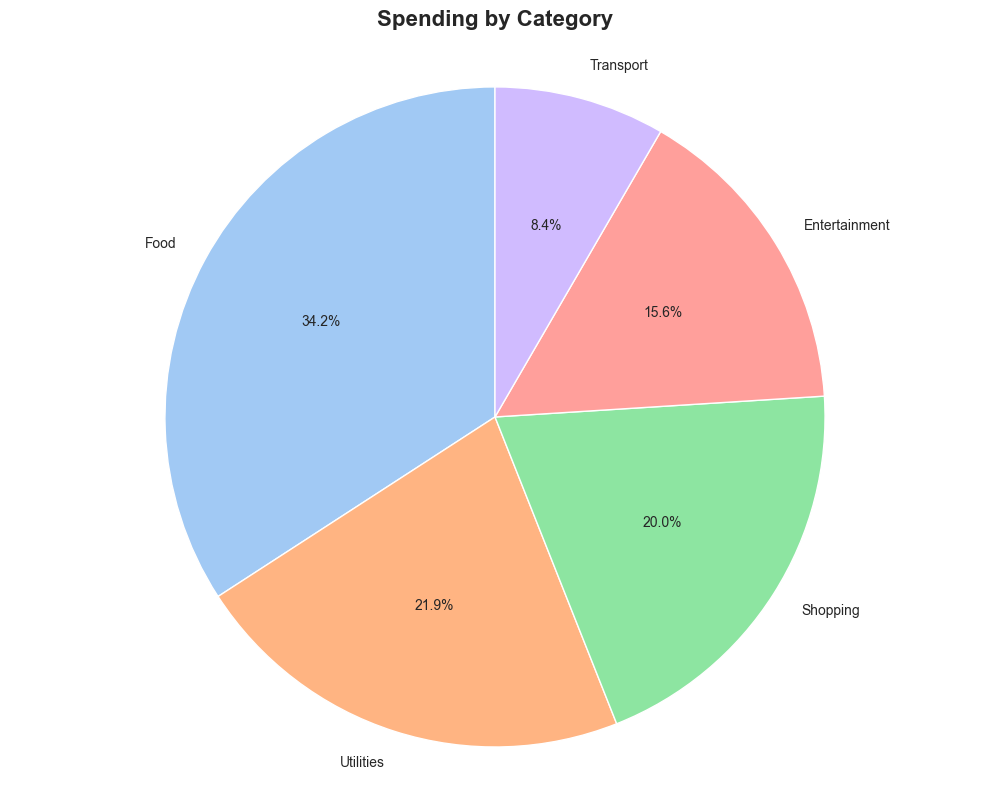


💡 Interpretation: Larger slices = more spending in that category


In [12]:
# Calculate total spending per category
category_totals = df.groupby('category')['amount'].sum().sort_values(ascending=False)

# Create figure and axis
# figsize sets the size (width, height) in inches
plt.figure(figsize=(10, 8))

# Create pie chart
# autopct shows percentages on the chart
# startangle rotates the chart (90 means start at top)
# colors uses a nice color palette from seaborn
plt.pie(category_totals, 
        labels=category_totals.index,
        autopct='%1.1f%%',  # Format: show 1 decimal place
        startangle=90,
        colors=sns.color_palette('pastel'))

# Add title
plt.title('Spending by Category', fontsize=16, fontweight='bold', pad=20)

# Equal aspect ratio ensures pie is circular
plt.axis('equal')

# Display the plot
plt.tight_layout()  # Adjust spacing
plt.show()

print("\n💡 Interpretation: Larger slices = more spending in that category")

### 8.2 Line Chart - Spending Over Time

**When to use**: Show trends and changes over time

**Best for**: Identifying patterns, seasonality, and trends

We'll show daily spending and a 7-day moving average to smooth out fluctuations.

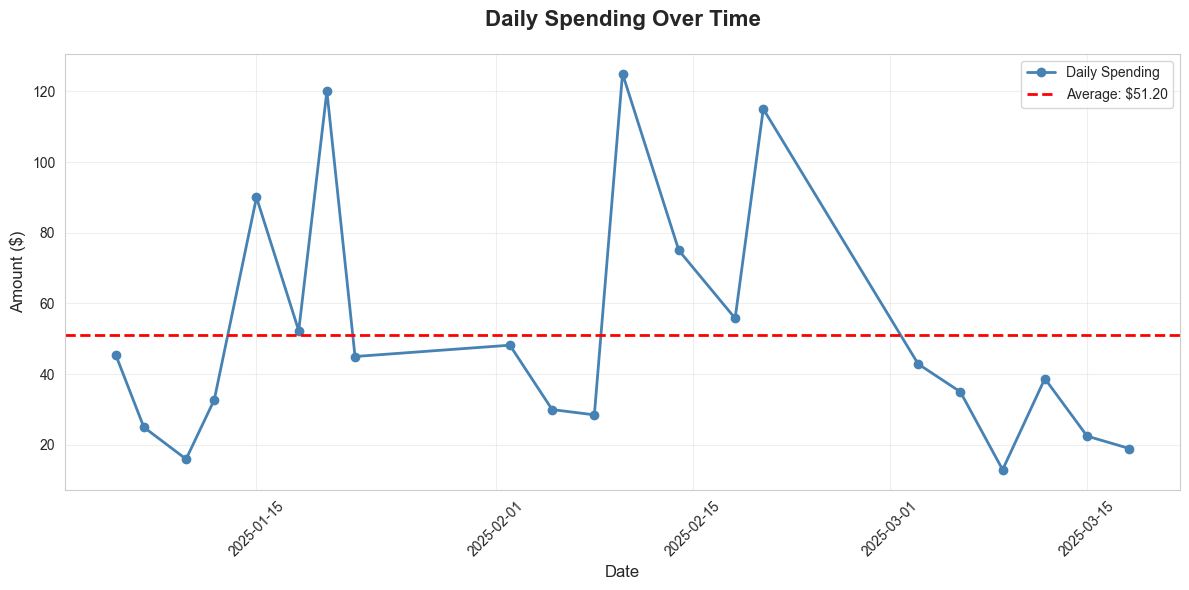


💡 Interpretation:
   - Points above red line = above-average spending days
   - Look for patterns: Do you spend more on weekends?


In [13]:
# Group by date and sum expenses (in case multiple expenses per day)
daily_spending = df.groupby('date')['amount'].sum().reset_index()

# Create the plot
plt.figure(figsize=(12, 6))

# Plot daily spending as points connected by lines
plt.plot(daily_spending['date'], 
         daily_spending['amount'],
         marker='o',  # Add circular markers at each point
         linestyle='-',  # Solid line
         linewidth=2,
         markersize=6,
         color='steelblue',
         label='Daily Spending')

# Add a horizontal line showing the average
avg_spending = daily_spending['amount'].mean()
plt.axhline(y=avg_spending, 
            color='red', 
            linestyle='--',  # Dashed line
            linewidth=2,
            label=f'Average: ${avg_spending:.2f}')

# Formatting
plt.title('Daily Spending Over Time', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Amount ($)', fontsize=12)
plt.legend(loc='upper right', fontsize=10)  # Show legend
plt.grid(True, alpha=0.3)  # Add subtle grid lines
plt.xticks(rotation=45)  # Rotate x-axis labels for readability

# Adjust layout to prevent label cutoff
plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("   - Points above red line = above-average spending days")
print("   - Look for patterns: Do you spend more on weekends?")

### 8.3 Bar Chart - Monthly Spending Comparison

**When to use**: Compare values across categories or time periods

**Best for**: Side-by-side comparisons

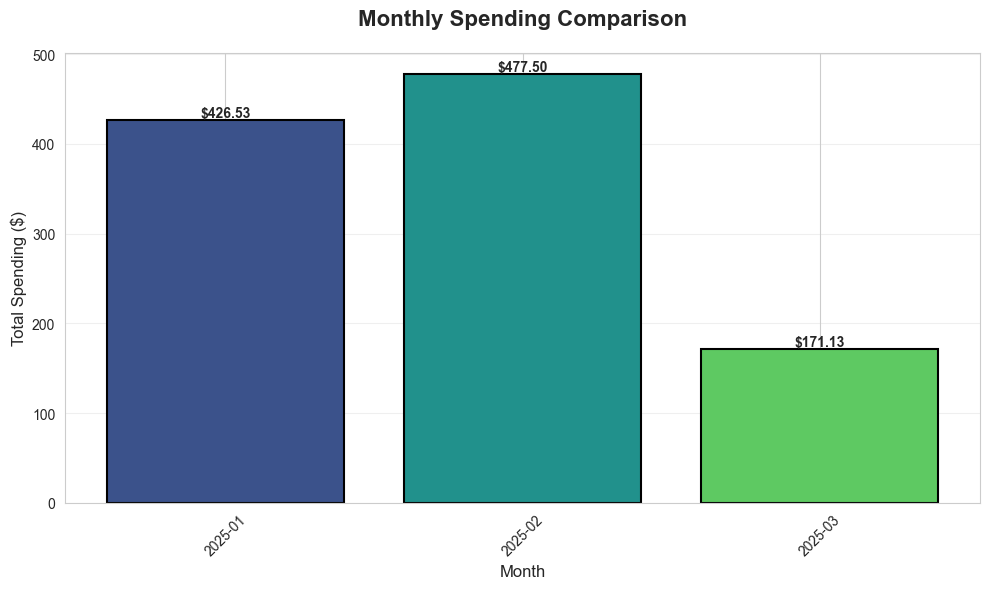


💡 Interpretation:
   - Taller bars = higher spending months
   - Compare heights to spot spending increases/decreases


In [14]:
# Prepare data: group by month
df_copy = df.copy()
df_copy['month'] = df_copy['date'].dt.to_period('M').astype(str)
monthly_spending = df_copy.groupby('month')['amount'].sum()

# Create bar chart
plt.figure(figsize=(10, 6))

# Create bars
# Use seaborn's color palette for nice colors
bars = plt.bar(monthly_spending.index, 
               monthly_spending.values,
               color=sns.color_palette('viridis', len(monthly_spending)),
               edgecolor='black',  # Black border around bars
               linewidth=1.5)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:.2f}',
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Formatting
plt.title('Monthly Spending Comparison', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Spending ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)  # Only horizontal grid lines

plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("   - Taller bars = higher spending months")
print("   - Compare heights to spot spending increases/decreases")

### 8.4 Bonus: Category Spending by Month (Stacked Bar Chart)

This advanced visualization shows how spending in each category changes month by month.

**Introduces**: Pivot tables and stacked bar charts

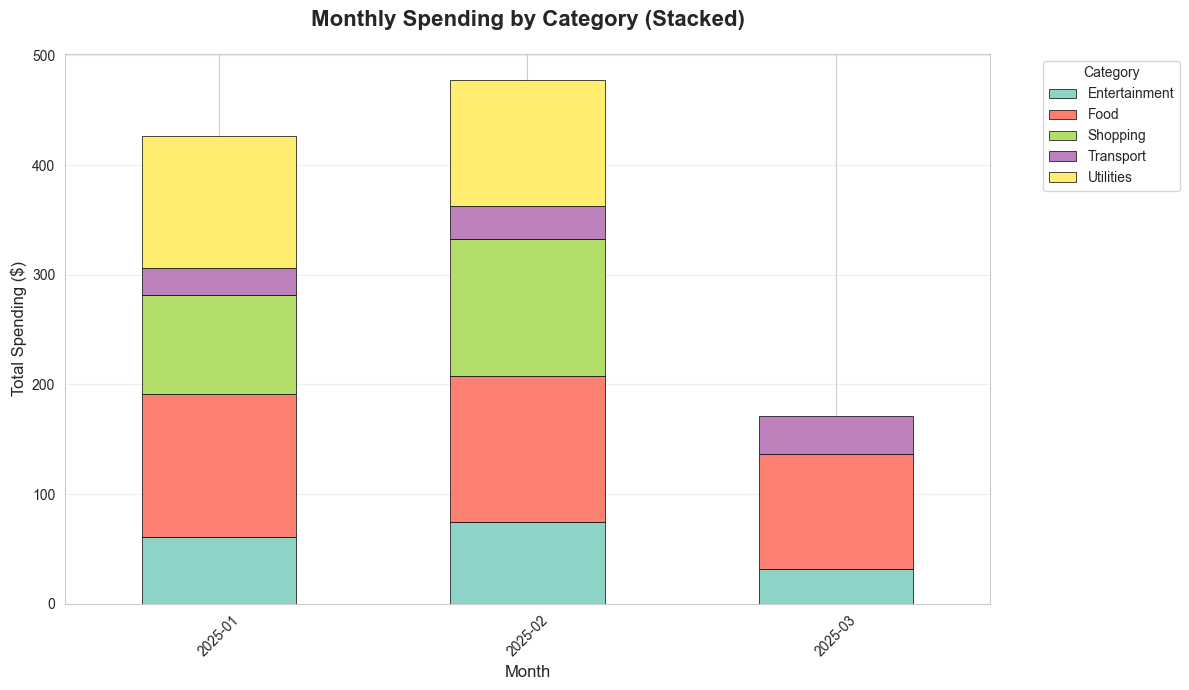


💡 Interpretation:
   - Each color = one category
   - Stack height = total monthly spending
   - Section sizes show how much each category contributes


In [15]:
# Prepare data using pivot table
df_copy = df.copy()
df_copy['month'] = df_copy['date'].dt.to_period('M').astype(str)

# Pivot table: rows=months, columns=categories, values=sum of amounts
# This reshapes data from "long" to "wide" format
pivot_data = df_copy.pivot_table(
    values='amount',
    index='month',
    columns='category',
    aggfunc='sum',
    fill_value=0  # Replace missing values with 0
)

# Create stacked bar chart
plt.figure(figsize=(12, 7))

# Plot stacked bars
pivot_data.plot(kind='bar', 
                stacked=True, 
                ax=plt.gca(),  # Use current axis
                colormap='Set3',  # Color scheme
                edgecolor='black',
                linewidth=0.5)

# Formatting
plt.title('Monthly Spending by Category (Stacked)', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Spending ($)', fontsize=12)
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legend outside plot
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n💡 Interpretation:")
print("   - Each color = one category")
print("   - Stack height = total monthly spending")
print("   - Section sizes show how much each category contributes")

### 💡 Understanding Pivot Tables:

A pivot table reorganizes data:

**Before** (long format):
```
date       | category | amount
2025-01-01 | Food     | 50
2025-01-01 | Gas      | 30
2025-02-01 | Food     | 45
```

**After pivot** (wide format):
```
month    | Food | Gas
2025-01  | 50   | 30
2025-02  | 45   | 0
```

**Use cases**: Creating summary tables, preparing data for certain visualizations

## 9. Advanced Analysis - Insights and Statistics

Let's extract some interesting insights from our data!

In [16]:
def get_spending_insights(dataframe):
    """
    Generate interesting insights from spending data.
    """
    print("🔍 SPENDING INSIGHTS")
    print("="*80)
    
    # Overall statistics
    total = dataframe['amount'].sum()
    count = len(dataframe)
    avg_transaction = dataframe['amount'].mean()
    median_transaction = dataframe['amount'].median()
    
    print(f"💰 Total Spending: ${total:.2f}")
    print(f"🧾 Total Transactions: {count}")
    print(f"📊 Average Transaction: ${avg_transaction:.2f}")
    print(f"📊 Median Transaction: ${median_transaction:.2f}")
    
    # Find most expensive purchase
    max_expense = dataframe.loc[dataframe['amount'].idxmax()]
    print(f"\n💸 Largest Expense:")
    print(f"   ${max_expense['amount']:.2f} - {max_expense['description']}")
    print(f"   Category: {max_expense['category']} | Date: {max_expense['date'].strftime('%Y-%m-%d')}")
    
    # Find smallest purchase
    min_expense = dataframe.loc[dataframe['amount'].idxmin()]
    print(f"\n💵 Smallest Expense:")
    print(f"   ${min_expense['amount']:.2f} - {min_expense['description']}")
    print(f"   Category: {min_expense['category']} | Date: {min_expense['date'].strftime('%Y-%m-%d')}")
    
    # Category insights
    top_category = dataframe.groupby('category')['amount'].sum().idxmax()
    top_category_amount = dataframe.groupby('category')['amount'].sum().max()
    top_category_pct = (top_category_amount / total) * 100
    
    print(f"\n🏆 Top Spending Category: {top_category}")
    print(f"   Total: ${top_category_amount:.2f} ({top_category_pct:.1f}% of total)")
    
    # Time analysis
    date_range = (dataframe['date'].max() - dataframe['date'].min()).days
    daily_avg = total / date_range if date_range > 0 else 0
    
    print(f"\n📅 Date Range: {date_range} days")
    print(f"📊 Average Daily Spending: ${daily_avg:.2f}")
    
    print("\n" + "="*80)

# Run insights analysis
get_spending_insights(df)

🔍 SPENDING INSIGHTS
💰 Total Spending: $1075.16
🧾 Total Transactions: 21
📊 Average Transaction: $51.20
📊 Median Transaction: $42.90

💸 Largest Expense:
   $125.00 - Winter jacket
   Category: Shopping | Date: 2025-02-10

💵 Smallest Expense:
   $12.99 - Spotify subscription
   Category: Entertainment | Date: 2025-03-09

🏆 Top Spending Category: Food
   Total: $367.20 (34.2% of total)

📅 Date Range: 72 days
📊 Average Daily Spending: $14.93



### 💡 Finding Max/Min in DataFrames:

```python
# Find maximum value
max_value = df['amount'].max()  # Returns the number

# Find index of maximum value
max_idx = df['amount'].idxmax()  # Returns row index

# Get entire row with maximum value
max_row = df.loc[df['amount'].idxmax()]  # Returns full row
```

Same works for `.min()` and `.idxmin()`!

## 10. Summary and Next Steps 🚀

Congratulations! You've built a complete Personal Finance Tracker and learned:

### ✅ Skills Acquired:

1. **Data Structures**
   - Created and manipulated pandas DataFrames
   - Understood rows, columns, and indices

2. **Data Manipulation**
   - Added new data with `pd.concat()`
   - Sorted and filtered data
   - Worked with datetime objects

3. **Data Analysis**
   - Used `.groupby()` for aggregations
   - Created pivot tables
   - Calculated statistics (mean, median, sum)

4. **Data Visualization**
   - Created pie charts (proportions)
   - Created line charts (trends)
   - Created bar charts (comparisons)

5. **File Operations**
   - Saved data to CSV
   - Loaded data from CSV

### 🎯 Next Steps to Expand This Project:

1. **Add Income Tracking**
   - Track income sources
   - Calculate net savings (income - expenses)

2. **Budget Features**
   - Set monthly budgets per category
   - Alert when approaching budget limits
   - Calculate budget vs. actual spending

3. **More Visualizations**
   - Heatmap of spending by day of week
   - Box plots to identify outliers
   - Scatter plots for correlation analysis

4. **Advanced Analysis**
   - Predict future spending using linear regression
   - Identify spending patterns and anomalies
   - Compare spending to previous periods

5. **User Interface**
   - Create a web interface with Streamlit
   - Add interactive dashboards with Plotly
   - Build a mobile app

6. **Data Import**
   - Import bank statements (CSV/Excel)
   - Connect to bank APIs
   - Parse email receipts

7. **Export Features**
   - Generate PDF reports
   - Export charts as images
   - Create Excel summaries

### 📚 Learning Resources:

- **Pandas**: [pandas.pydata.org](https://pandas.pydata.org/docs/)
- **Matplotlib**: [matplotlib.org](https://matplotlib.org/)
- **Seaborn**: [seaborn.pydata.org](https://seaborn.pydata.org/)
- **DataCamp**: Interactive Python courses
- **Kaggle**: Practice with real datasets

### 💪 Practice Exercises:

1. Add 10 new expenses from your own life
2. Create a new category and add expenses to it
3. Find your highest spending day
4. Calculate spending for a specific date range
5. Create a function to delete an expense
6. Add data validation (e.g., check category spelling)
7. Create a weekly spending analysis

---

**Remember**: The best way to learn is by doing! Modify this code, break things, fix them, and experiment.

Happy coding! 🎉

## 📝 Quick Reference - Useful Code Snippets

Save these for quick access:

```python
# Add an expense
df = add_expense(df, '2025-03-20', 'Food', 25.50, 'Pizza')

# Save to file
save_expenses(df, 'expenses.csv')

# Load from file
df = load_expenses('expenses.csv')

# View recent expenses
df.tail(10)

# Filter by category
food_expenses = df[df['category'] == 'Food']

# Filter by date range
march_expenses = df[(df['date'] >= '2025-03-01') & (df['date'] < '2025-04-01')]

# Total for a category
df[df['category'] == 'Food']['amount'].sum()

# Count transactions by category
df['category'].value_counts()
```